# Exploring Two or More Variables

## Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)

In [17]:
import pandas as pd
import seaborn as sns

In [18]:
kc_tax0 = pd.read_csv('./data/kc_tax.csv')
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [19]:
kc_tax0_strip = kc_tax0.loc[
    (kc_tax0["TaxAssessedValue"] < 750_000) &
    (kc_tax0["SqFtTotLiving"] > 100) &
    (kc_tax0["SqFtTotLiving"] < 3500),
    :
]

kc_tax0_strip

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


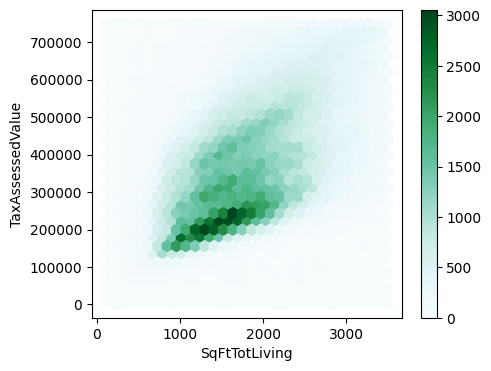

In [20]:
ax = kc_tax0_strip.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue", gridsize=30, sharex=False, figsize=(5,4))

As you can see, _hexagonal binning plot_ shows the tax-assessed value, square foot and the count of records for bins at the same time.

## Contours

We take a sample from our dataset because it takes too much time to render.

In [21]:
sample = kc_tax0_strip.sample(n=50000, random_state=42)

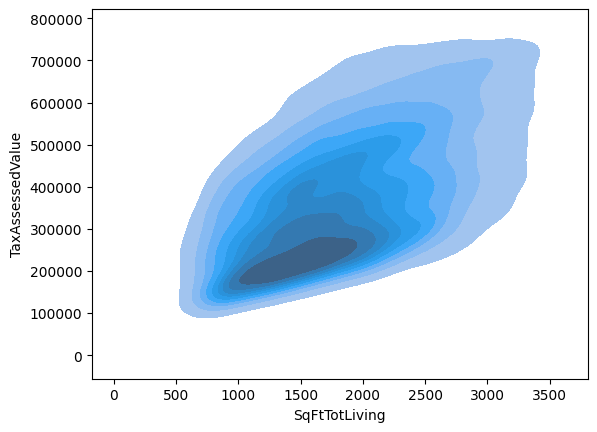

In [23]:
ax = sns.kdeplot(x=sample.SqFtTotLiving, y=sample.TaxAssessedValue, fill=True)